# **Watershed Algorithm for marker-based image segmentation**

#### **Objectives:**
1. How to use the Watershed algorithm for marker-based image segmentation

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# **Watershed Algorthim Theory**

Any grayscale image can be thought of as a topographic surface, with valleys represented by low intensity and peaks and hills by high intensity. 

Using that analogy, this algorithm begins to fill in the troughs, or low areas, with a different colored label (our water). 

Depending on the surrounding peaks and gradients, as the water rises, it will naturally begin to blend the colors of the many valleys. You erect barriers where water mixes in order to prevent that. Once all of the peaks are submerged, you keep filling them with water and erecting obstacles. 

The consequence of segmentation is what you created in the barriers. The "philosophy" underlying the watershed is this. 


In the [CMM webpage](http://cmm.ensmp.fr/~beucher/wtshed.html) on watershed to understand it with the help of some animations.

However, because of noise or other anomalies in the image, their approach results in an oversegmented image. 

As a result, OpenCV developed a marker-based watershed method that lets you choose which valley points should be combined and which ones shouldn't. It assigns many labels to the familiar objects we know. The area that we are certain is the foreground or object should be labeled with one color (or intensity), the area that we are certain is the background or non-object should be labeled with a different color, and the area where we are unsure of anything should be labeled with 0. Our marker is that. Next, utilize the watershed algorithm. Then our marker will be updated with the labels we gave, and the boundaries of objects will have a value of -1.

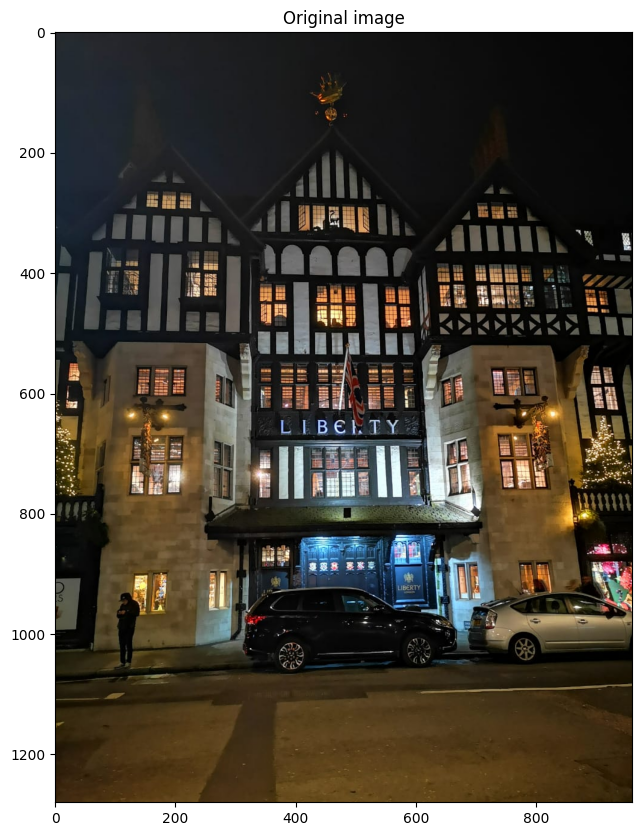

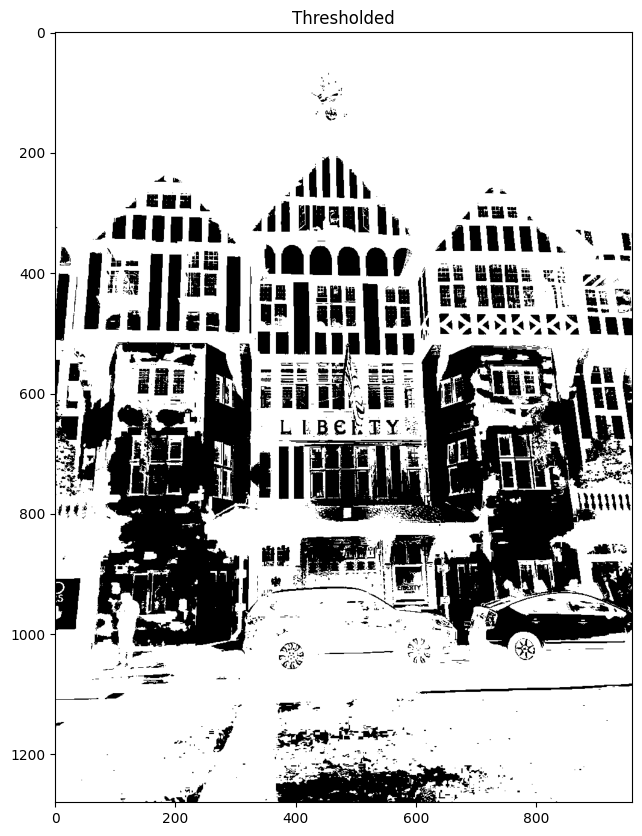

In [10]:
# Load image
img = cv2.imread('./images/liberty.jpeg')
imshow("Original image", img)

# Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold using OTSU
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

imshow("Thresholded", thresh)

## **Removing the touching masks**

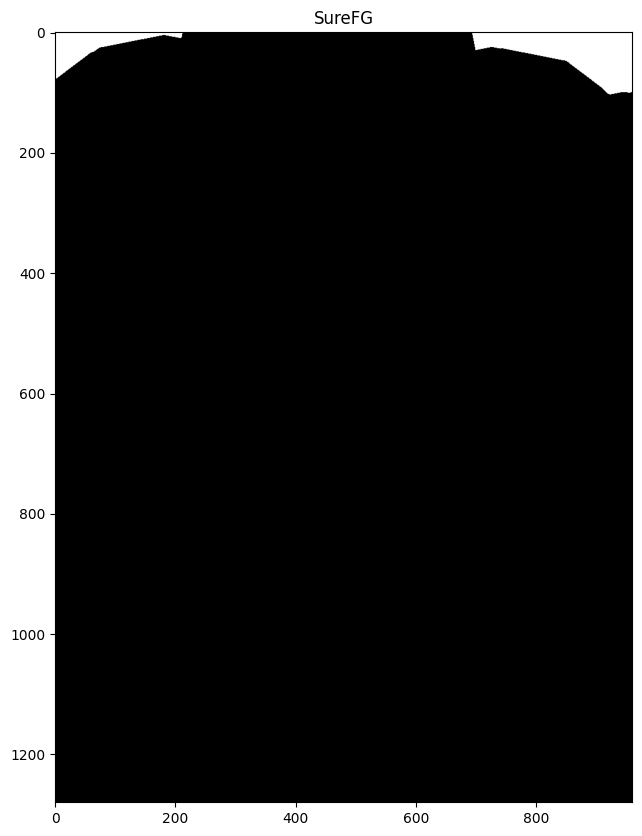

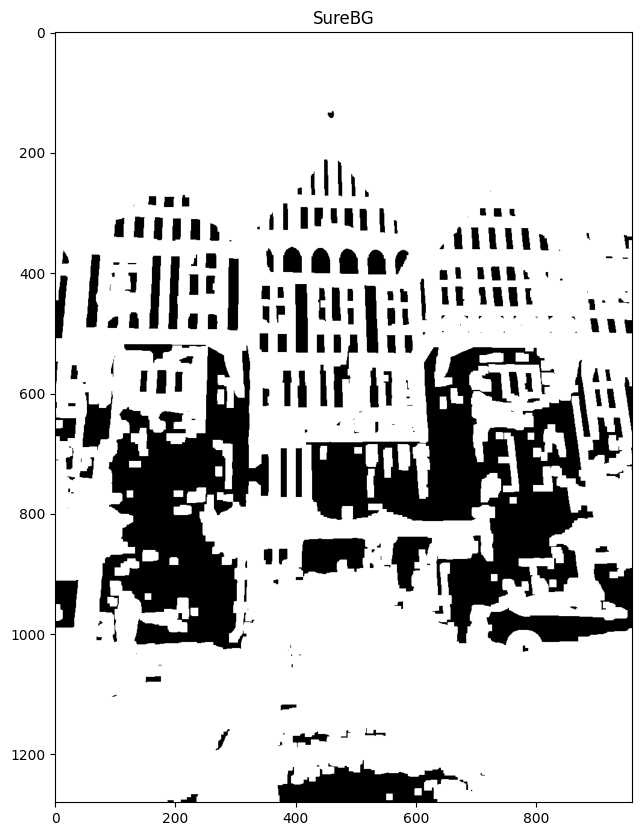

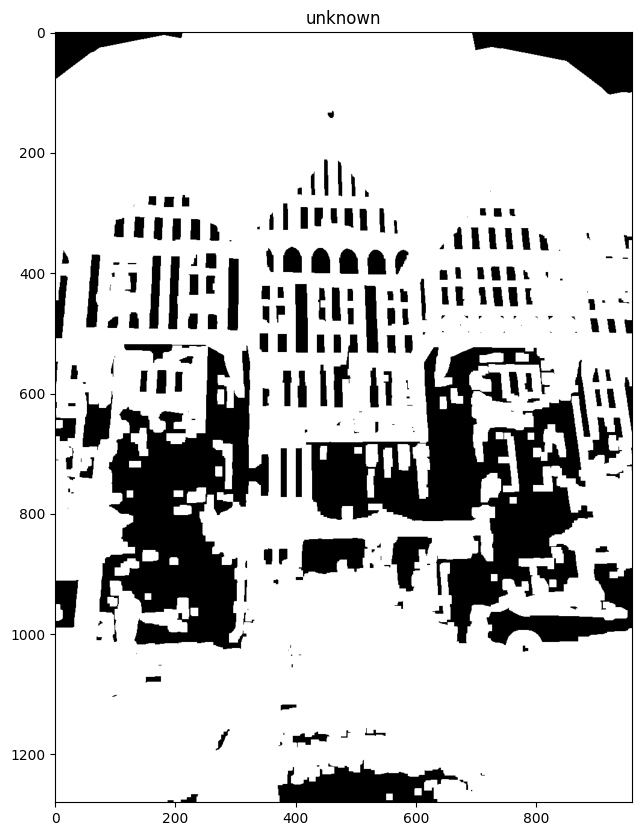

In [11]:
# noise removal
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

imshow("SureFG", sure_fg)
imshow("SureBG", sure_bg)
imshow("unknown", unknown)

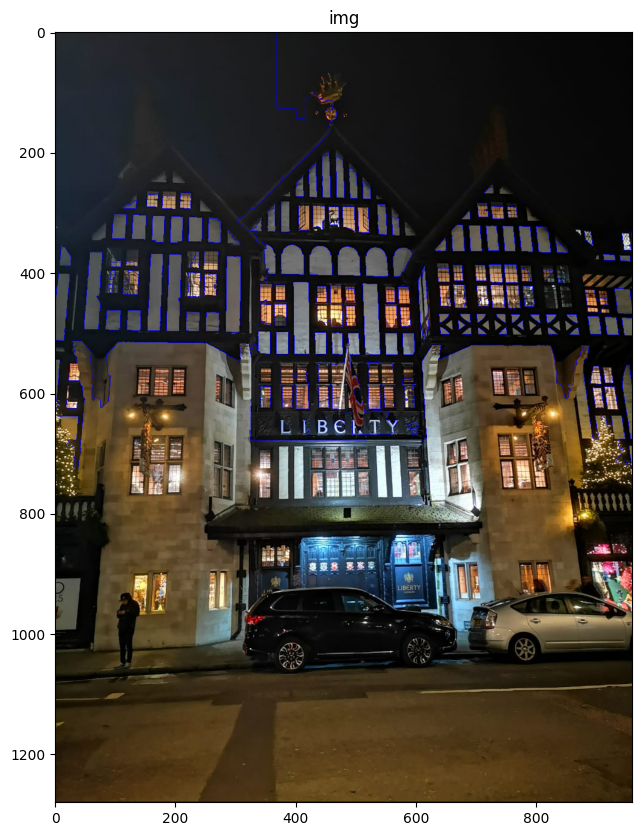

In [12]:
# Marker labelling
# Connected Components determines the connectivity of blob-like regions in a binary image.
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

imshow("img", img)